# **A PYTORCH WORKFLOW**

In [ ]:
# torch.zeros([2, 4], dtype=torch.int32)
# cuda0 = torch.device('cuda:0')
# torch.ones([2, 4], dtype=torch.float64, device=cuda0)

# **what_were_covering**


*   1: data (prepare and load)
*   2: build model
* 3: fitting the model to data(training)
*  4: "making predictions and evaluating a model (inference)
* 5: saving and loading a model
* 6: putting it all together"





In [ ]:
# Let getting start with the required libraries to be used next in future:
import torch
from torch import nn      # nn(neural network) contains all of pytorch"s building blocks
import matplotlib.pyplot as plt

# lets check the version of pytorch:
torch.__version__

'2.3.0+cu121'

# **DATA** (PREPARING AND LOADING)
# **inputs data to neural netwrok**
Data can be almost anything ... in machine learning
* Excel spreadsheet
* image of any kind
* Videos(youtube has lots of data..)
* Audio like songs or podcasts
* Text

# now what we are going to focused on:
MACHINE LEARNING IS A GAME OF TWO PARTS:
* 1: Geting data into a numerical representation.
* 2:Build a model to learn patterns in that numerical representation.

To showcase the above points lets create some **known** data using linear regression formula.
we are going to use linear regression formula to make a straight line with known **parameters**.

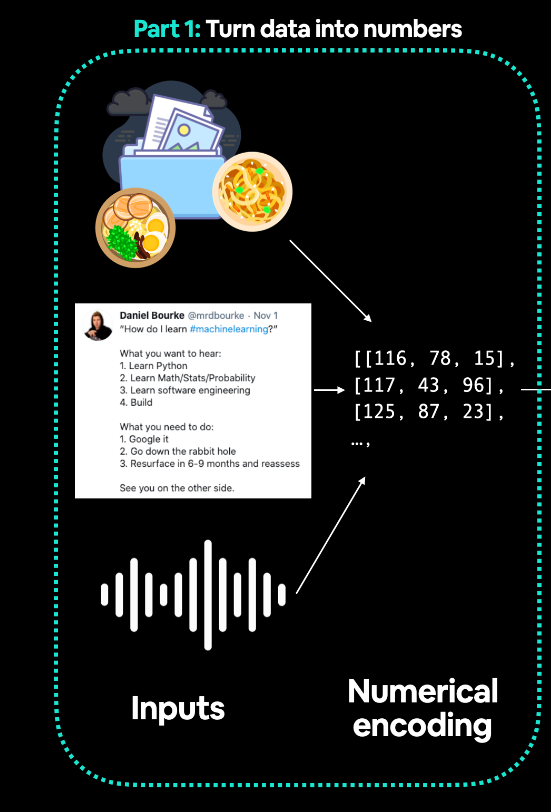

In [ ]:
# Creeate *known* parameters:
weights = 0.7
bias = 0.3
# weights and bias are the two other common name that we are going to hear again and again in future

# now we need to build a model that will be able to estimate these numbers

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)       #we use unsqueeze() function here to add extra dimension
"""
why is X capital here as we see in machine learning typically the
Capital letters are use to show tensors or matrix
and lower case are use to show vector but in this case
its going to be littel different because here X is used as vector but later on
X will start to be a matrix:
"""

# we are going to create a formula here which is: Y = a + bx
Y = weights * X + bias

# now lets have look it hese following numbers:
print(X[:10], Y[:10], sep="\n")
print(f"The length of len(X) is : {len(X)}", f"The length of len(Y) is : {len(Y)}", sep = "\n")


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
The length of len(X) is : 50
The length of len(Y) is : 50


# **Splitting data into training and test sets** ( one of the most important concepts in machine learning in general)

### There are **three kind of Data set**


### 1.   **Training set**
      The model learn from this data(like the course materiaals you study during the semester)

### 2.   **Validation set**
      The model gets tuned on this data (like the practice exayou take before the final exam)
  
### 3.   **Testing set**
      The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).

Let's create a training and test set with our data:


In [ ]:
# create a train/test split of the above data:
train_split = int(0.8 * len(X))
X_train, Y_train = X[ : train_split],Y[ : train_split]
X_test, Y_test = X[train_split : ],Y[train_split : ]
print(len(X_train), len(Y_train), len(X_test), len(Y_test))

40 40 10 10


In [ ]:
print(X_train, Y_train, sep="\n")

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [

## How might we better visualize our data..?

## this is the data explorer's motto comes in..!

## "visualize, visualize, visualize"

In [ ]:
import matplotlib.pyplot as plt
# lets define a function to plot a graph of the test and train data:
def plot_predictions(train_data = X_train,
                      train_labels = Y_train,
                      test_data = X_test,
                      test_labels = Y_test,
                      predictions = None):
    """
    Plots training dat, test data and compares predications.
    """
    plt.figure(figsize = (10, 7), facecolor = "g")


    # Plot traning data in blue:
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in red:
    plt.scatter(test_data, test_labels, c="g", s=6, label="Testing data")

    # Are there predications?
    if predictions is not None:
      #  the predication if they exists:
      plt.scatter(test_data, predictions, c="r", s=10, label="Predications")


      #Show the legend
    plt.legend(prop={"size":14})


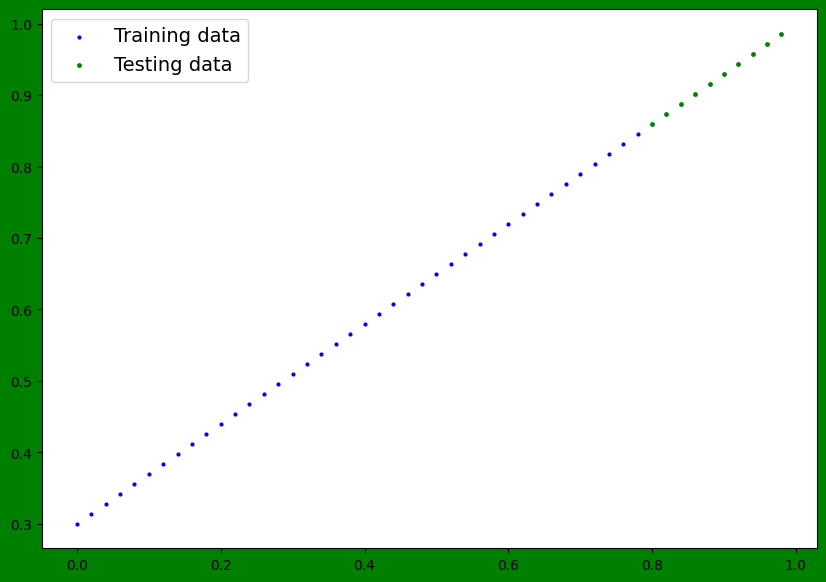

In [ ]:
plot_predictions();

# **Build model**

our first pytorch model:

this is very exciting ..lets do it..!

Because we are going to be  building classes through out:

# What our model does:


*   start with random vlaue (weights and  bias)

*   look at training data and adjust the random values to better represent(or get closer to) the ideal vlaues (the weights and bias values we sue to create the data)

# How does it do so ?
 Through two main algorithms:

*   Gradient descent
*   Backpropagation






In [ ]:
# Create linear regressions model class
class LinearRegressionModel(nn.Module):     # almost everything in pytorch inherhits form nn.Module
    def __init__(self):
      super().__init__()
      # lets create a parameter for weights:
      self.weights = nn.Parameter(torch.randn(1,   # start with a random weights and try to adjust it with ideal weight
                                             requires_grad = True,     # can this parameter be updated via gradient descent?
                                             dtype = torch.float))      #pytorch loves the datatype of torch.float32

      # lets create a parameter for bias:
      self.bias = nn.Parameter(torch.randn(1,    #  start with a random weights and try to adjust it with ideal weight
                                             requires_grad = True,    # can this parameter be updated via gradient descent?
                                             dtype = torch.float))        # pytorch loves the datatype of torch.float32

    # Now we are going to create a forward method to define the computation in the model:
    def forward(self, x:torch.Tensor) -> torch.Tensor:  #<- "x" is the input data
        return self.weights * x + self.bias     # this is the linear regression formula:


# pytorch model **buiding essentials**
* **toech.nn** : contain all of the buildings for computational graph(a neural network can be considered a computational graph)
* **torch.nn.parameter** : what parameters should our model try and learn, ofteh=n a pytorch layer from torch.nn will set these for us
* **torch.nn.Module**: The base clss for all neural network modules, if you subclass it, you shoud overwrite forward()
* **torch.optim** : This where the optiization in pytorch live, they wil help with gradient descent
* **def forward()** : All nn.Module subclass require you to overwrite forward(, this method define what happens in the forward computation.

## Checking the contents of our Pytorch model

now we have created a model, let's see whats inside..

so we can check our model parameter or what's inside our model using .parameters().

In [ ]:
# Create a random seed
# we will use manual seed because we define the parameter with random number so they will give different number every time:
torch.manual_seed(42)

#Create an instance of the model (this is subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
# By using list(model_0.parameters()), you are converting the iterator of parameters into a list.
# This is often done for inspection or debugging purposes, to see all the parameters of the model.
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list the name parameters:
# model_0.state_dict() provides a snapshot of all the learnable parameters in model_0,
# which is useful for saving, loading, and inspecting the model's parameters.
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# lets check what was our ideal weight and bias:
weights, bias

(0.7, 0.3)

# Making **prediction** using torch.infererence_mode()

To check our model's predictive power, let's how well it predicts Y_test based on X_test

when we pass data thorugh our model, its going to run it through the forward() m
ethod.

In [ ]:
print(X_test,Y_test, sep = "\n")

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [ ]:
# lets make predication with model:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
# lets check the Y_test to know how much the predications are far:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

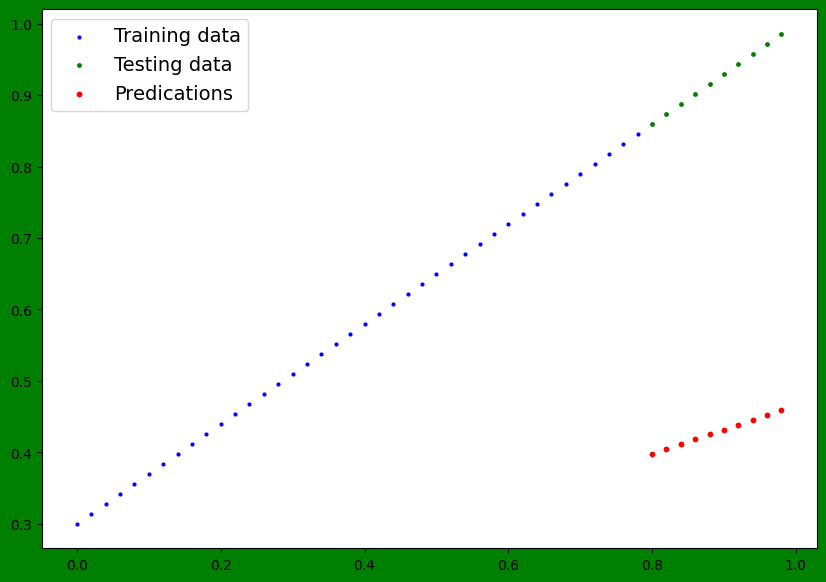

In [ ]:
# lets make a graph to see the predication on graph:
plot_predictions(predictions = y_preds)

## 3. Train model

The Whole idea of training is for a model to move from some *unkonwn* parameter (these may be random) to some known parameters.

or in other word form from a poor representation of the data to a better representation of the data.

one way to meausere how poor or how wrong your models predictions are is to use a loss function.

* **Note :** Loss function may also be called cost function or criterion in different areas. for our case, we are going to refer to it as a loss function.

* Things we need to train:

* **Loss function :** A function to measure how wrong your model's predictions are to the ideal outputs, low is better.

* **Optimizer :** Takes into accounr the loss of a model and adjusts the model's parameter (e.g weight & bias in our case) to improve the loss function.

* Inside the optimizer you'll oftn have toset two parameters:
* lr(learning rate) - the learning rate is a hyperparamter thst defines how big/small the optimizer changes the parameters with each step( a small lr result in small change , a large lr result in large changes)
And specifically for pytorch we, need
* A training loop.
* A testing loop.

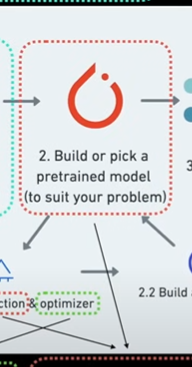

In [ ]:
# check out model parameter (a parameter is vlaue that model set by it self) enlist the parameter in model_0:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# TRAINING MODEL **STEPS**
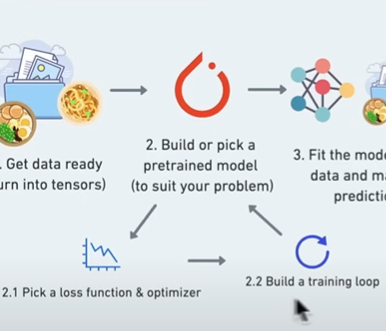


# **2.1** PICK A **LOSS FUNCTION** AND **OPTIMIZER** AS SHOWN BELLOW

In [ ]:
# lets come to disscus loss function:
loss_fn = nn.L1Loss()    # if we will increase the wait the loss function will reduce
# loss function will 	Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.


# now lets set an optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.01)  # lr = learning rate = possially te most important hyper parameter, is a vlaue that us as a data scientist and machnine learning engineer can set:
# change in learning rate can in parameter (the smaller the learning rate the smaller the change parameter the larger the learning rate the larger the change in parameter)
# optimizer will adjust the model parameter to minimize loss function: and Tells your model how to update its internal parameters to best lower the loss.

### **Question:** Which loss funcction and optiizer should i used..?
**Answer:** This will be problem specific . But the experience, you will get an idea of the works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of n.L1Loss() and an optimizer like torch.optim.SGD() will suffice.

but for a classification problem ike classifying wheter a photo is of dog or a cat , you'll likely want to use a loss function of nn.CELoss() (binary cross entropy loss)

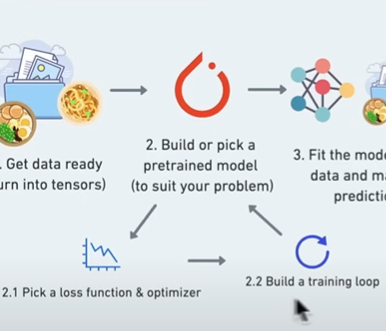

# **2.2** BUILDing A **TRAINING LOOP** in pytorch:
A couple of thing we need to know for training a loop
0. loop through the data
1. Forward pass(this involves data moving trough our model's 'forward()' function) to make predications on data - also called forward propagation.
2. Calculate the loss ( compare forward pass predication to ground truth labels)
3. optimizer zero grad
4. loss backword - move backword through the network to calcaulate the gradient of each of the parameters ofour model with respect to the loss (**backpropagation**)
5. optimier step - use te optimizer to adjust our models parameter =s to try and improve the loss(**gradient descent**)

# pytorch optmizing loop song
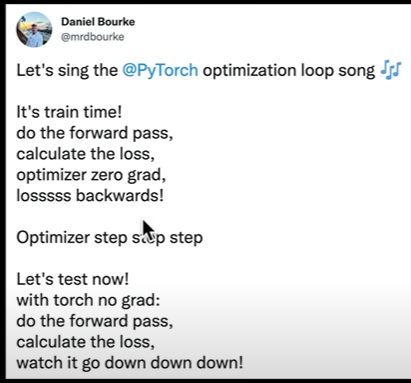

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(42)

# an epoch is one loop through data ... (this is hyperparameter because we have set it by ourselfs:)
epochs = 180

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### TRAINING:
# 0. loop through the data :
for epoch in range(epochs):
  # set the model to training mode.
  model_0.train()  # train mode in pytorch set all parameters tat require gradient to require gradients

  # 1. FORWARD pass

  y_pred = model_0(X_train)

  ## 2. Calculating the loss:
  loss = loss_fn(y_pred, Y_train)
  # print(f"loss is: {loss}")

  # 3. Optimizer the grad:
  optimizer.zero_grad()

  # 4. perform backpropagation on the lpss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer (perform gradient )
  optimizer.step()   # by default how he optimizer changes will accomulate thorugh the loop so ... we have zero them above in step 3 for the next iteration of the loop:



### Testing
  model_0.eval()   # turn off different setting in the model not needed for evaluation/testing.(dropout)
  with torch.inference_mode():    # turn off gradient tracking & a coupe more things behind the scene.
    #1. Do the forward pass:
    test_pred = model_0(X_test)

    #2. Calculate the loss:
    test_loss = loss_fn(test_pred, Y_test)

  # print out whats going on:
  if epoch % 10 == 0 :
    print(f"Epoch:{epoch} | loss : {loss} | Test loss : {test_loss}")
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    ### print out the model static_dict():
    print(model_0.state_dict())


Epoch:0 | loss : 0.31288138031959534 | Test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | loss : 0.1976713240146637 | Test loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | loss : 0.08908725529909134 | Test loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | loss : 0.053148526698350906 | Test loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | loss : 0.04543796554207802 | Test loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | loss : 0.04167863354086876 | Test loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | loss : 0.03818932920694351 | Test loss : 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

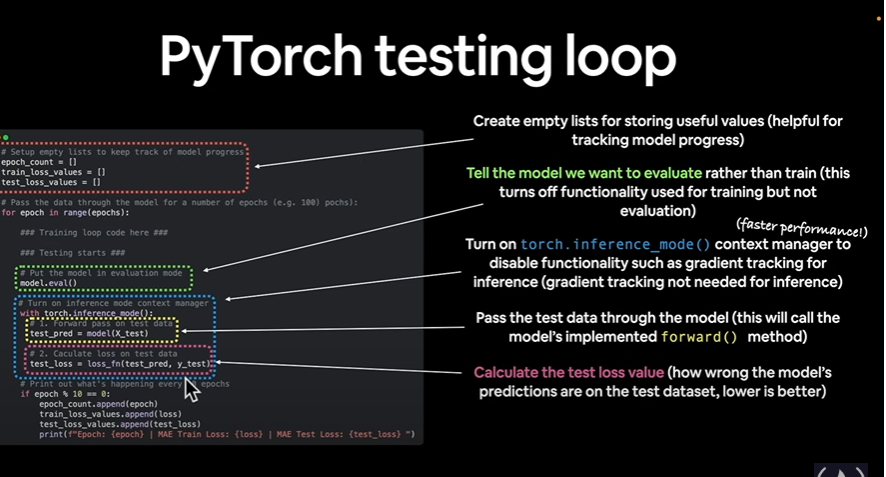

In [ ]:
# lests have look what the above lists look like
epoch_count, loss_values, test_loss_values   # the output of the loss_values is in tensor.

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
 

In [ ]:
## lets change the tensor of loss_values to numpy:
import numpy as np
np.array(torch.tensor(loss_values))

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248], dtype=float32)

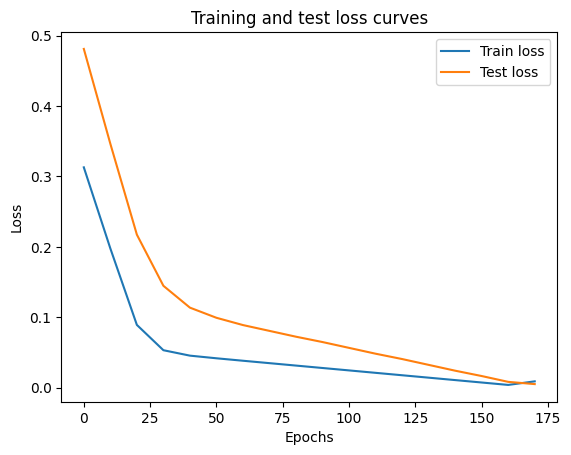

In [ ]:
### plot the graph of the loss curves:
plt.plot(epoch_count, np.array(torch.tensor(loss_values)), label = "Train loss")    #Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
# beacause matplotlab work with numpy.
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

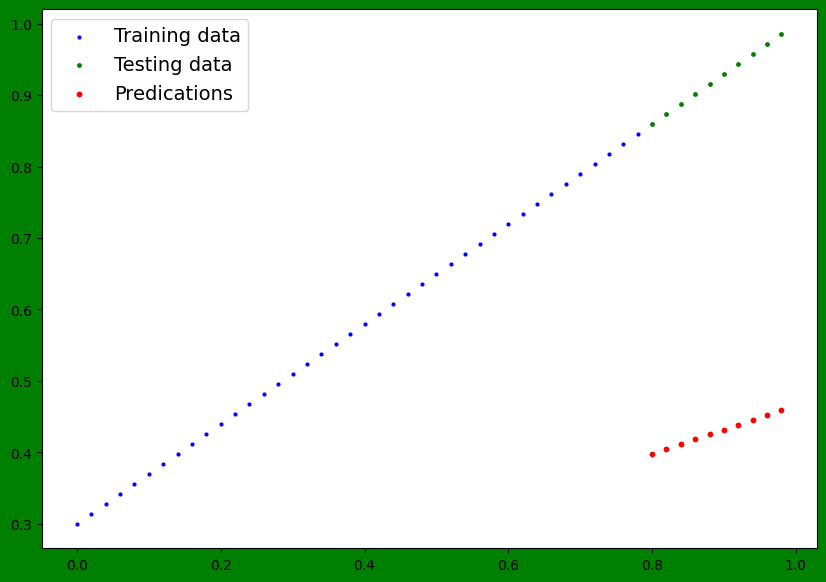

In [ ]:
# lets have look on the pevious prediction graph
plot_predictions(predictions = y_preds)

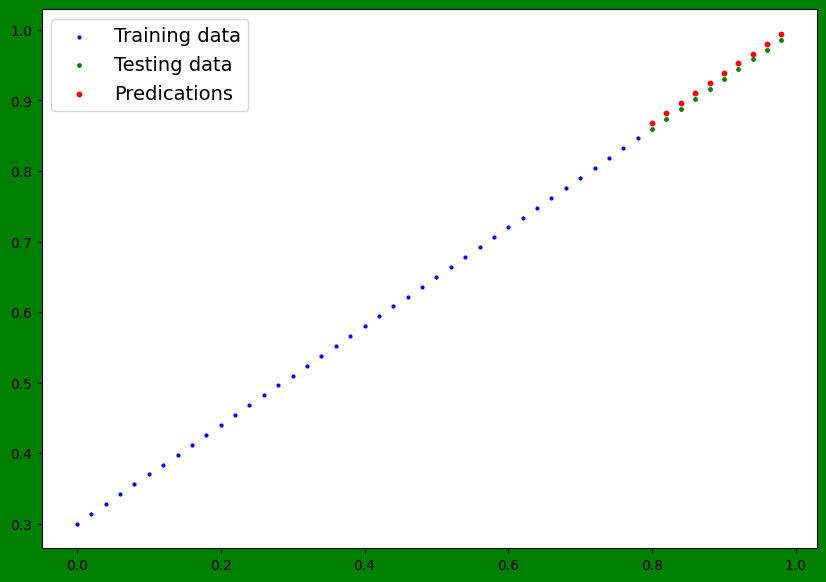

In [ ]:
plot_predictions(predictions = y_preds_new)

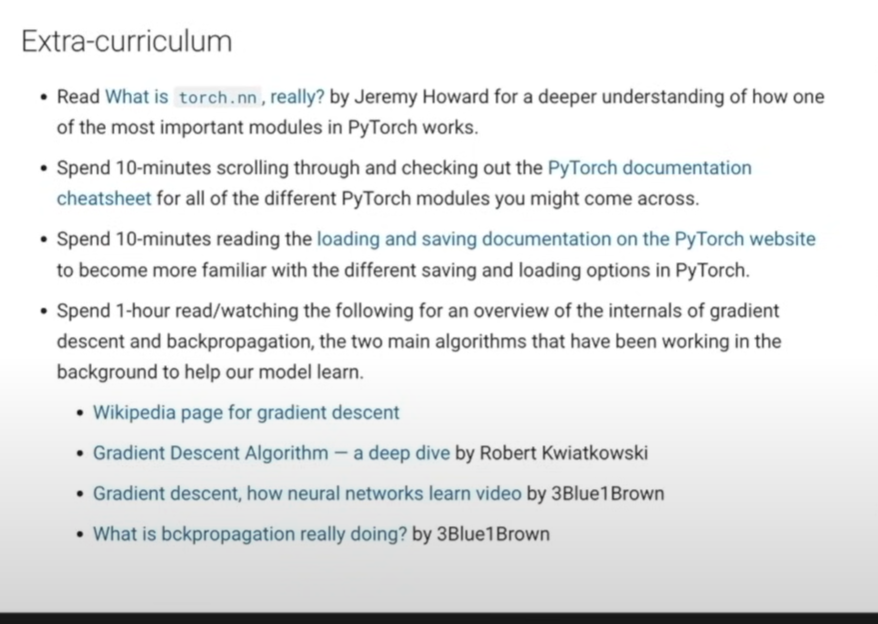

# Saving a model in pytorch
There are three main methods you should abouts for saving and loading models in pytorch


1.  torch.save() - Allows you save a Pytorch obkect in python's pickle formate

2. torch.load() -   Allows you load a saved Pytorch object.

3. torch.nn.module.load_static_dict() -  This allows you to load model's saved state dictionary

Pytoch save & load code + extra-curriculam - https://pytorch.org/A/beginner/saving_loading_models.html


4. **Home work**


*   save/load state_dict()
*   save/load Entire Model:
*   to read all the section of the above link and pros and corns of the above to saving and loading types.




In [ ]:
# Saving our Pytorch model:
from pathlib import Path

 # 1. Create model directory
Model_path = Path("models")
Model_path.mkdir(parents = True, exist_ok = True)
# 2. Create model save path
Model_name = "01_pytorch_workflow_model_0.pth"
Model_save_path = Model_path / Model_name
# 3. Save the model state dict
print(f"Saving model to : {Model_save_path}")
torch.save(obj = model_0.state_dict(), f = Model_save_path)

Saving model to : models/01_pytorch_workflow_model_0.pth


In [ ]:
# to see the model location.
!ls -1 models

01_pytorch_workflow_model_0.pth


# loading a pytorch model:
Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the save state_dict of model_0 (tis will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = Model_save_path))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predications with our oaded model:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# make some model preds:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Campair loaded model preds with original model preds:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Here's the end of saving and loading model